In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sal_data = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Dataset09-Employee-salary-prediction.csv")
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
sal_data.shape

(375, 6)

In [10]:
sal_data.columns

Index(['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary'], dtype='object')

In [11]:
sal_data.columns = ['Age','Gender','Degree','Job_Title','Experience_years','Salary']

In [12]:
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [13]:
sal_data.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_years    float64
Salary              float64
dtype: object

In [14]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [15]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [17]:
sal_data[sal_data.duplicated()].shape

(50, 6)

In [22]:
sal_data1 = sal_data.drop_duplicates(keep = 'first')
sal_data1.shape

(325, 6)

In [23]:
sal_data1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_years    1
Salary              1
dtype: int64

In [24]:
sal_data1.dropna(how = 'any', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\1780007887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how = 'any', inplace=True)


In [25]:
sal_data1.shape

(324, 6)

In [26]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [27]:
sal_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [28]:
corr = sal_data1[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

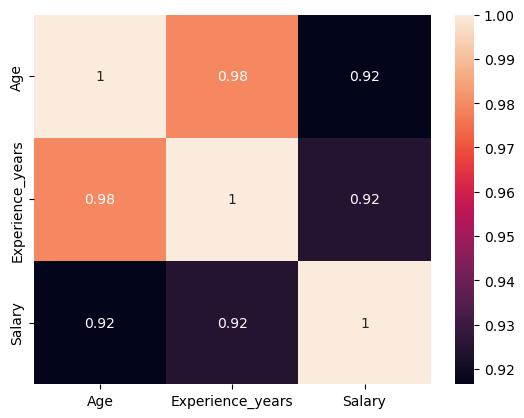

In [29]:
sns.heatmap(corr, annot = True)

In [30]:
sal_data1['Degree'].value_counts()

Degree
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

<Axes: xlabel='Degree'>

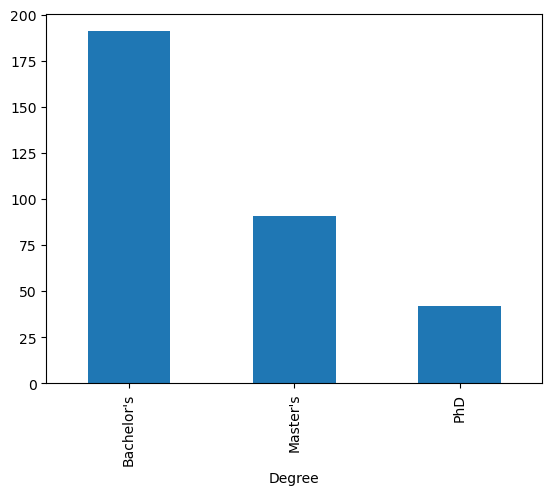

In [31]:
sal_data1['Degree'].value_counts().plot(kind = 'bar')

In [32]:
sal_data1['Job_Title'].value_counts()

Job_Title
Director of Operations            9
Director of Marketing             8
Senior Marketing Manager          8
Senior Project Manager            7
Senior Data Scientist             6
                                 ..
Junior Social Media Specialist    1
Junior Operations Coordinator     1
Senior HR Specialist              1
Director of HR                    1
Junior Financial Advisor          1
Name: count, Length: 174, dtype: int64

In [33]:
sal_data1['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<Axes: ylabel='Gender'>

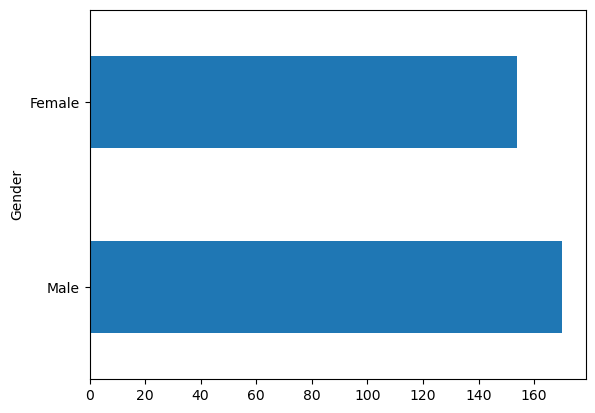

In [35]:
sal_data1['Gender'].value_counts().plot(kind = 'barh')

<Axes: ylabel='Frequency'>

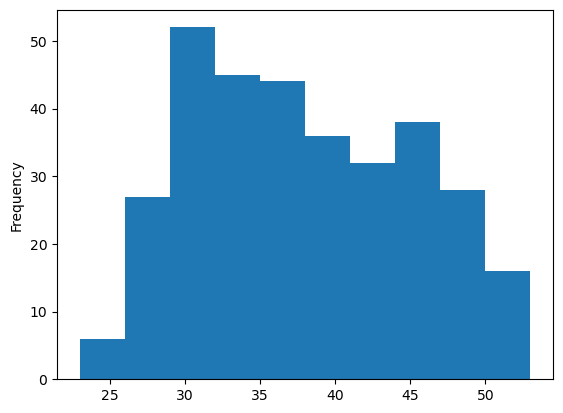

In [36]:
sal_data1.Age.plot(kind = 'hist')

<Axes: >

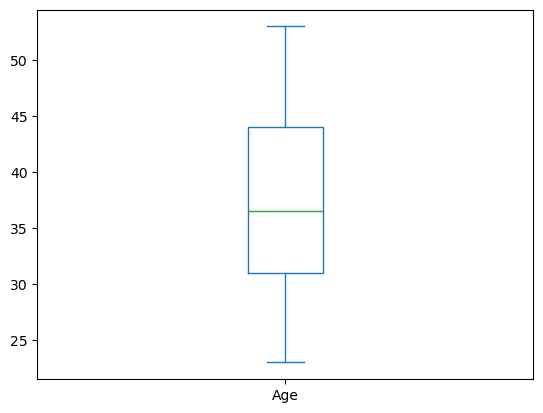

In [37]:
sal_data1.Age.plot(kind = 'box')

<Axes: >

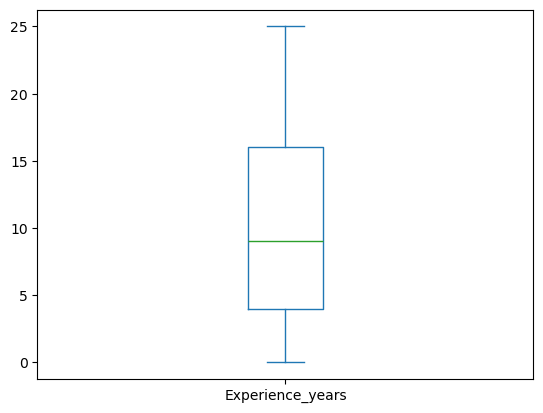

In [38]:
sal_data1.Experience_years.plot(kind = 'box')

<Axes: >

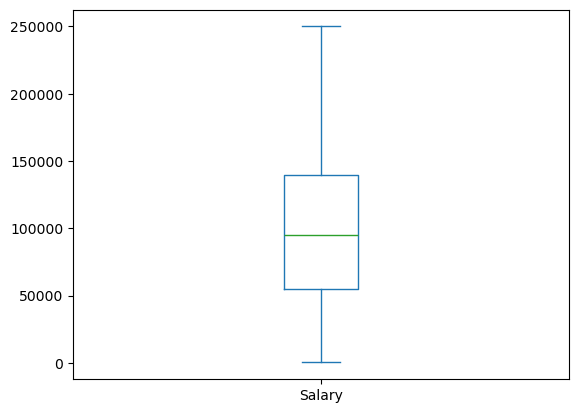

In [39]:
sal_data1.Salary.plot(kind = 'box')

<Axes: ylabel='Frequency'>

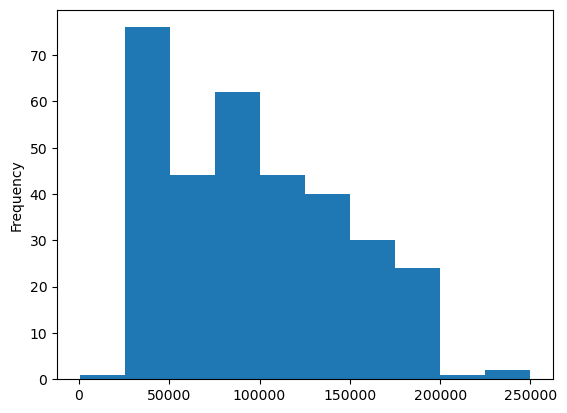

In [40]:
sal_data1.Salary.plot(kind = 'hist')

In [41]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [42]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [43]:
sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\1017469824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])


In [44]:
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\446779904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])


In [45]:
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\840262182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])


In [46]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [47]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [49]:
sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_years']])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\2823734138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\2823734138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_years']])


In [50]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [56]:
X = sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_years_scaled']]
y = sal_data1['Salary']

In [57]:
X.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
x_train.shape, y_train.shape # 80%

((259, 5), (259,))

In [69]:
x_test.shape, y_test.shape #20%

((65, 5), (65,))

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
Linear_regeression_model = LinearRegression()

In [97]:
Linear_regeression_model.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred_lr =Linear_regeression_model.predict(x_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [74]:
df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted': y_pred_lr })
df['Error'] = df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


In [99]:
Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

np.float64(10570.78640113618)

In [100]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [80]:
r2_score(y_test, y_pred_lr)

0.8911231066517088

In [81]:
print(f'Accuracy of the model = {round(r2_score(y_test, y_pred_lr),4)*100} %')

Accuracy of the model = 89.11 %


In [82]:
round(mean_absolute_error(y_test, y_pred_lr),2)

10570.79

In [83]:
print(f"Mean Absolute Error = {round(mean_absolute_error(y_test, y_pred_lr),2)}")

Mean Absolute Error = 10570.79


In [84]:
mse = round(mean_squared_error(y_test, y_pred_lr),2)
mse

205754135.72

In [85]:
print(f"Mean Squared Error = {round(mean_squared_error(y_test, y_pred_lr),2)}")

Mean Squared Error = 205754135.72


In [86]:
print('Root Mean Squared Error (RMSE) = ', mse**(0.5))

Root Mean Squared Error (RMSE) =  14344.132449193294


In [101]:
Linear_regeression_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

In [102]:
Linear_regeression_model.intercept_

np.float64(86001.4932055321)

In [ ]:
sal_data1.head()

In [106]:
Age1 = std_scaler.transform([[49]]) #customize predictions
Age = 5.86448677
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])
Experience_years = 0.74415815
# Find the Salary = ? 

C:\Users\ASUS\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [109]:
std_scaler.transform([[15]])[0][0]

C:\Users\ASUS\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(0.7441581452572275)

In [110]:
Emp_Salary = Linear_regeression_model.predict([[Age, Gender, Degree, Job_Title, Experience_years]])
Emp_Salary

C:\Users\ASUS\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249925.15061728])

In [111]:
print("Salary of that Employee with above Attributes = ", Emp_Salary[0])

Salary of that Employee with above Attributes =  249925.15061727603


In [115]:
import joblib
joblib.dump(Linear_regeression_model, 'model.pkl')

['model.pkl']

In [116]:
model = joblib.load('model.pkl')

In [117]:
sample_input = [[35, 13, 40, 1, 1]]  # replace with actual values in same order as your training features
prediction = model.predict(sample_input)
print("Predicted Salary:", prediction[0])

Predicted Salary: 1524559.1200025636


C:\Users\ASUS\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [118]:
print(X.columns)

Index(['Age_scaled', 'Gender_Encode', 'Degree_Encode', 'Job_Title_Encode',
       'Experience_years_scaled'],
      dtype='object')


In [119]:
sample_input = [[35, 13, 40, 1, 1]]  # replace with actual values in same order as your training features
prediction = model.predict(sample_input)
print("Predicted Salary:", prediction[0])

Predicted Salary: 1524559.1200025636


C:\Users\ASUS\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [121]:
# Custom input values (already scaled and encoded)
# Age_scaled = 5.86
# Gender_Encode = 0 (Female)
# Degree_Encode = 2
# Job_Title_Encode = 22
# Experience_years_scaled = 0.7441

# Predict salary using the custom values
custom_features = [[5.86, 0, 2, 22, 0.74415815]]
predicted_salary = model.predict(custom_features)

print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 249834.5991008791


C:\Users\ASUS\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [22]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

# 1. Load dataset (same CSV used in the video)
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Dataset09-Employee-salary-prediction.csv")

# 2. Manually encode categorical columns as per tutorial
df['gender_scaled'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['degree_encode'] = df['Education_Level'].map({"Bachelors": 0, "Masters": 1, "PhD": 2})
df['job_title_encode'] = df['job_title'].map({
    "Software Engineer": 0, "Data Scientist": 1, "Manager": 2, "Analyst": 3
})

# 3. Scale numeric features
scaler = StandardScaler()
X = df[['age_scaled', 'gender_scaled', 'degree_encode', 'job_title_encode', 'experience_years_scaled']]
X_scaled = scaler.fit_transform(X)

# 4. Define target as per video
y = df['salary']

# 5. Train Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)

# 6. Save model and scaler for later use
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler trained & saved successfully!")

KeyError: 'Education_Level'

In [31]:
import pandas as pd

# Load your CSV
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Dataset09-Employee-salary-prediction.csv")

# Show actual column names
print("Actual column names:")
print(df.columns.tolist())

# Show first few rows
print("\nSample data:")
print(df.head())

Actual column names:
['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']

Sample data:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Dataset09-Employee-salary-prediction.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'])

# Separate features and target
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(X_scaled, y)

# Save model, scaler, and column names
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "columns.pkl")  # save column names

['columns.pkl']

In [38]:
import joblib

# Save the model
joblib.dump(model, "model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the column names
joblib.dump(X.columns.tolist(), "columns.pkl")

# Print confirmation
print("Files saved:")
print("- model.pkl")
print("- scaler.pkl")
print("- columns.pkl")

Files saved:
- model.pkl
- scaler.pkl
- columns.pkl


In [2]:
import joblib
columns = joblib.load("columns.pkl")
print(columns)

['Age', 'Years of Experience', 'Gender_Female', 'Gender_Male', "Education Level_Bachelor's", "Education Level_Master's", 'Education Level_PhD', 'Job Title_Account Manager', 'Job Title_Accountant', 'Job Title_Administrative Assistant', 'Job Title_Business Analyst', 'Job Title_Business Development Manager', 'Job Title_Business Intelligence Analyst', 'Job Title_CEO', 'Job Title_Chief Data Officer', 'Job Title_Chief Technology Officer', 'Job Title_Content Marketing Manager', 'Job Title_Copywriter', 'Job Title_Creative Director', 'Job Title_Customer Service Manager', 'Job Title_Customer Service Rep', 'Job Title_Customer Service Representative', 'Job Title_Customer Success Manager', 'Job Title_Customer Success Rep', 'Job Title_Data Analyst', 'Job Title_Data Entry Clerk', 'Job Title_Data Scientist', 'Job Title_Digital Content Producer', 'Job Title_Digital Marketing Manager', 'Job Title_Director', 'Job Title_Director of Business Development', 'Job Title_Director of Engineering', 'Job Title_Dir